# Unsupervised Learning Capstone - Sarcasm Detection
This is the Unsupervised Learning Capstone for Thinful Data Science program. For this capsone, I will be using the article headline dataset from Kaggle. The link of the dataset is below. 
https://www.kaggle.com/rmisra/news-headlines-dataset-for-sarcasm-detection


---

The goal for this capsone is identify the article is sarcastic or not using the provided headline of the article. In this dataset, article url link will be provided as well. We will use three approaches here for this project. The first approach will be using clustering as classifier, and evaluate its accuracy. The second approach will be using clustering as feacture reduction, and then use classification algorithms like logistic regression, random forst, and etc. for classification. The third approach will be using the simple nerual network (MLP Classifier) from SK Learn libray. 

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn import metrics

import time

sns.set_style('white')
import warnings
warnings.filterwarnings("ignore")

In [2]:
from IPython.display import display
pd.options.display.max_columns = None
pd.set_option('display.max_colwidth', -1)

In [3]:
#from google.colab import drive
#drive.mount('/content/gdrive')

In [4]:
raw_df = pd.read_json(
    'Sarcasm_Headlines_Dataset.json',
    lines=True)

In [5]:
raw_df.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5,former versace store clerk sues over secret 'black code' for minority shoppers,0
1,https://www.huffingtonpost.com/entry/roseanne-revival-review_us_5ab3a497e4b054d118e04365,"the 'roseanne' revival catches up to our thorny political mood, for better and worse",0
2,https://local.theonion.com/mom-starting-to-fear-son-s-web-series-closest-thing-she-1819576697,mom starting to fear son's web series closest thing she will have to grandchild,1
3,https://politics.theonion.com/boehner-just-wants-wife-to-listen-not-come-up-with-alt-1819574302,"boehner just wants wife to listen, not come up with alternative debt-reduction ideas",1
4,https://www.huffingtonpost.com/entry/jk-rowling-wishes-snape-happy-birthday_us_569117c4e4b0cad15e64fdcb,j.k. rowling wishes snape happy birthday in the most magical way,0


In [6]:
raw_df.shape

(26709, 3)

In [7]:
!pip install tldextract
import tldextract

You are using pip version 18.1, however version 19.1.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [8]:
# Use tldextract to extract the domain name. 
df = pd.DataFrame()
df['source'] = raw_df['article_link'].apply(lambda x: tldextract.extract(x)[1])

In [9]:
df.head()

,source
0,huffingtonpost
1,huffingtonpost
2,theonion
3,theonion
4,huffingtonpost


## Data Cleaning

In [10]:
# Remove all special characters, but keep space. 
df['headline'] = raw_df['headline'].replace('[^a-zA-Z0-9]+',' ',regex=True)

In [11]:
# Lemmatization
import spacy
nlp = spacy.load('en')

df['headline_cleaned'] = df['headline'].apply(
    lambda x: [w.lemma_ for w in nlp(x)])

In [12]:
# Remove stop words
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop = stopwords.words('english')

df['headline_cleaned'] = df['headline_cleaned'].apply(
    lambda x: [item for item in x if item not in stop])

[nltk_data] Downloading package stopwords to C:\Users\Jonathan
[nltk_data]     Zhao\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to C:\Users\Jonathan
[nltk_data]     Zhao\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [13]:
df.head()

,source,headline,headline_cleaned
0,huffingtonpost,former versace store clerk sues over secret black code for minority shoppers,"[former, versace, store, clerk, sue, secret, black, code, minority, shopper]"
1,huffingtonpost,the roseanne revival catches up to our thorny political mood for better and worse,"[roseanne, revival, catch, -PRON-, thorny, political, mood, well, bad]"
2,theonion,mom starting to fear son s web series closest thing she will have to grandchild,"[mom, start, fear, son, web, series, close, thing, -PRON-, grandchild]"
3,theonion,boehner just wants wife to listen not come up with alternative debt reduction ideas,"[boehner, want, wife, listen, come, alternative, debt, reduction, idea]"
4,huffingtonpost,j k rowling wishes snape happy birthday in the most magical way,"[j, k, rowling, wish, snape, happy, birthday, magical, way]"


## Simple EDA

In [14]:
df['is_sarcastic'] = raw_df['is_sarcastic']
df.head()

,source,headline,headline_cleaned,is_sarcastic
0,huffingtonpost,former versace store clerk sues over secret black code for minority shoppers,"[former, versace, store, clerk, sue, secret, black, code, minority, shopper]",0
1,huffingtonpost,the roseanne revival catches up to our thorny political mood for better and worse,"[roseanne, revival, catch, -PRON-, thorny, political, mood, well, bad]",0
2,theonion,mom starting to fear son s web series closest thing she will have to grandchild,"[mom, start, fear, son, web, series, close, thing, -PRON-, grandchild]",1
3,theonion,boehner just wants wife to listen not come up with alternative debt reduction ideas,"[boehner, want, wife, listen, come, alternative, debt, reduction, idea]",1
4,huffingtonpost,j k rowling wishes snape happy birthday in the most magical way,"[j, k, rowling, wish, snape, happy, birthday, magical, way]",0


Total Number of Article is NOT Sarcastic: 14985
Total Number of Article is Sarcastic: 11724


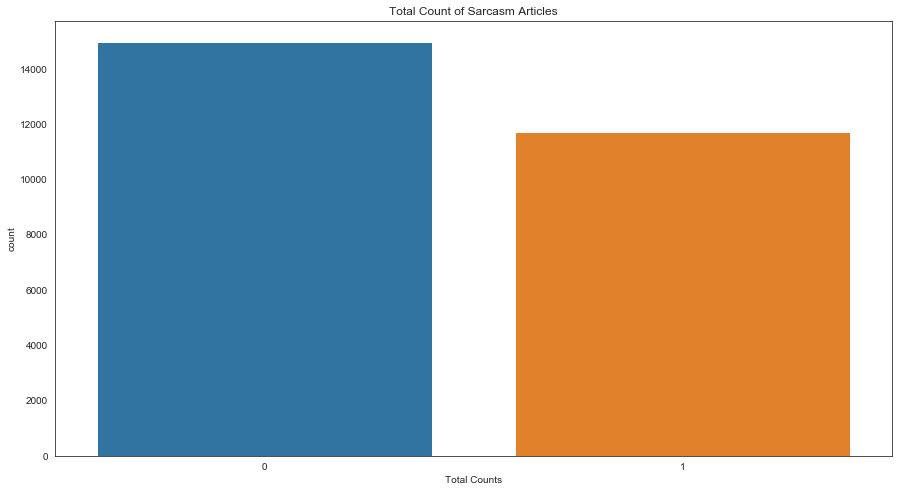

In [15]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x="is_sarcastic", data=df)
ax.set_title('Total Count of Sarcasm Articles')
ax.set_xlabel('Total Counts')

print('Total Number of Article is NOT Sarcastic: ' + 
      str(df[df['is_sarcastic'] == 0].shape[0]))
print('Total Number of Article is Sarcastic: ' + 
      str(df[df['is_sarcastic'] == 1].shape[0]))

As we can see from above plot, the total number of sarcastic articles is smaller than non-sarcarstic articles. However, there are not much of difference here. Since these are articles and its headlines, and I do not create fake articles and headlines to make both classes balance. Therefore, I will not balance the classes here. 

In [16]:
# Check how many unique sources we have. 
df['source'].unique()

array(['huffingtonpost', 'theonion', 'comhttp', 'comhttps'], dtype=object)

comhttp and comhttps does not seem like a valid domain name for a website. I will check on these sources and find out what's wrong. 

In [17]:
raw_df[df['source'] == 'comhttps'][:5]

,article_link,headline,is_sarcastic
159,https://www.huffingtonpost.comhttps://www.washingtonpost.com/lifestyle/megyn-kelly-preps-for-her-trump-interview-a-chance-to-go-to-a-different-place/2016/05/16/15e46206-187a-11e6-9e16-2e5a123aac62_story.html?hpid=hp_hp-top-table-main_kelly-2pm:homepage/story,megyn kelly on donald trump: 'i have done my level best to not make this story about me',0
175,https://www.huffingtonpost.comhttps://www.washingtonpost.com/opinions/an-assault-on-our-values/2016/06/13/a0eadc98-31ae-11e6-8758-d58e76e11b12_story.html,donald trump's assault on our values,0
436,https://www.huffingtonpost.comhttps://www.washingtonpost.com/world/national-security/military-prosecutor-senate-report-on-cia-interrogation-program-is-accurate/2016/02/10/d75d51a8-cf47-11e5-88cd-753e80cd29ad_story.html,military prosecutor: senate report on cia interrogation program is accurate,0
677,https://www.huffingtonpost.comhttps://www.washingtonpost.com/world/jailed-washington-post-correspondent-has-christmas-meal-with-family/2015/12/25/dacdb3ac-ab2d-11e5-bff5-905b92f5f94b_story.html?postshare=2821451070250310&tid=ss_tw,washington post journalist jailed in iran has christmas meal with family,0
950,https://www.huffingtonpost.comhttps://www.washingtonpost.com/politics/fiery-republican-race-heads-to-sc-known-for-dirty-tricks-and-brawls/2016/02/10/a99b161e-d024-11e5-b2bc-988409ee911b_story.html?hpid=hp_hp-top-table-main_southcarolina-830pm:homepage/story,"gop race heads to south carolina, known for dirty tricks and brawls",0


In [18]:
raw_df[df['source'] == 'comhttp'][:5]

,article_link,headline,is_sarcastic
12,https://www.huffingtonpost.comhttp://www.theguardian.com/world/2016/may/31/north-korea-praises-trump-and-urges-us-voters-to-reject-dull-hillary,north korea praises trump and urges us voters to reject 'dull hillary',0
23,https://www.huffingtonpost.comhttp://pubx.co/dnWZew,this is why you shouldn't go to the circus,0
54,https://www.huffingtonpost.comhttp://www.wsj.com/articles/self-financing-campaign-all-the-way-would-have-been-a-stretch-for-trump-1463341722,donald trump wouldn't have had the ready cash to self-finance entire campaign — analysis,0
131,https://www.huffingtonpost.comhttp://www.baltimoresun.com/news/maryland/bs-md-eyeam-baltimore-tour-20150515-story.html,councilman calls on baltimore rappers to inspire students,0
166,https://www.huffingtonpost.comhttp://baltimore.cbslocal.com/2015/07/18/the-wire-cast-reunited-in-baltimore-to-uplift-community/,'the wire' cast reunited in baltimore to uplift community,0


After checking article links for both comhttp and comhttps sources, seems like these links have an extra huffingtonpost link in front of the actual links. I am not sure if these articles are from hufffingtonpost or other websites. Therefore, I decided to classified these links as Others for source. 

In [19]:
df['source'].replace('comhttp','others', inplace=True)
df['source'].replace('comhttps','others', inplace=True)

In [20]:
df['source'].unique()

array(['huffingtonpost', 'theonion', 'others'], dtype=object)

Total Number of Article from HuffingtonPost: 14403
Total Number of Article from The Onion: 11724
Total Number of Article from Other Sources: 582


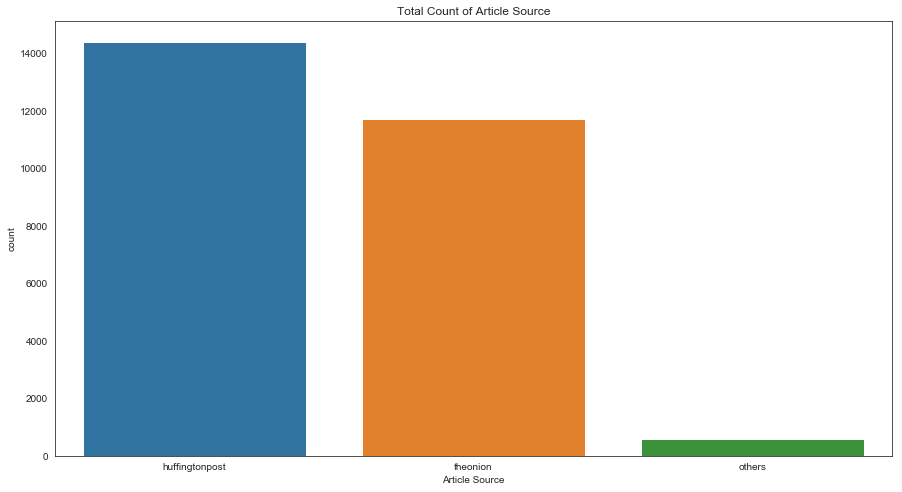

In [21]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x="source", data=df)
ax.set_title('Total Count of Article Source')
ax.set_xlabel('Article Source')

print('Total Number of Article from HuffingtonPost: ' + 
      str(df[df['source'] == 'huffingtonpost'].shape[0]))
print('Total Number of Article from The Onion: ' + 
      str(df[df['source'] == 'theonion'].shape[0]))
print('Total Number of Article from Other Sources: ' + 
      str(df[df['source'] == 'others'].shape[0]))

Total Number of Articles from HuffingtonPost is NOT Sarcastic:14403
Total Number of Articles from HuffingtonPost is Sarcastic:0
Total Number of Articles from The Onion is NOT Sarcastic:0
Total Number of Articles from The Onion is Sarcastic:11724
Total Number of Articles from Others is NOT Sarcastic:582
Total Number of Articles from Others is Sarcastic:0


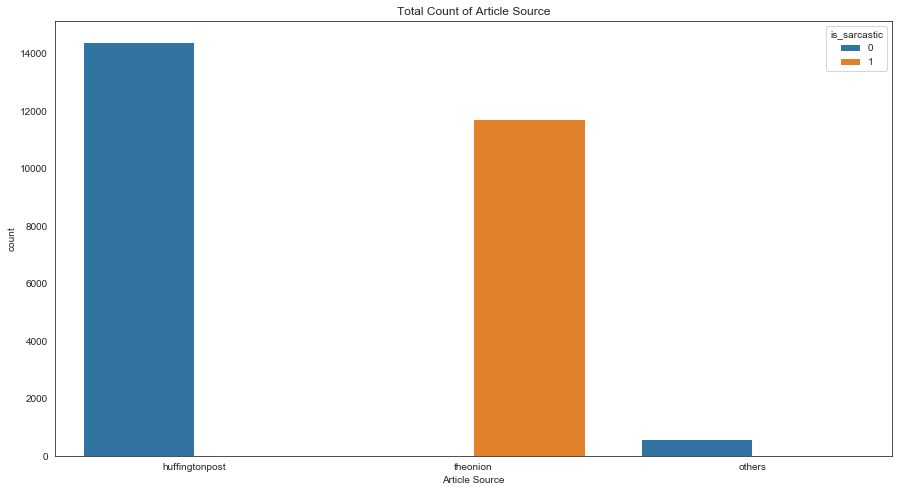

In [22]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x="source",hue='is_sarcastic', data=df)
ax.set_title('Total Count of Article Source')
ax.set_xlabel('Article Source')

print('Total Number of Articles from HuffingtonPost is NOT Sarcastic:' + 
      str(df[(df['source']=='huffingtonpost') & (df['is_sarcastic'] == 0)].shape[0]))
print('Total Number of Articles from HuffingtonPost is Sarcastic:' + 
      str(df[(df['source']=='huffingtonpost') & (df['is_sarcastic'] == 1)].shape[0]))
print('Total Number of Articles from The Onion is NOT Sarcastic:' + 
      str(df[(df['source']=='theonion') & (df['is_sarcastic'] == 0)].shape[0]))
print('Total Number of Articles from The Onion is Sarcastic:' + 
      str(df[(df['source']=='theonion') & (df['is_sarcastic'] == 1)].shape[0]))
print('Total Number of Articles from Others is NOT Sarcastic:' + 
      str(df[(df['source']=='others') & (df['is_sarcastic'] == 0)].shape[0]))
print('Total Number of Articles from Others is Sarcastic:' + 
      str(df[(df['source']=='others') & (df['is_sarcastic'] == 1)].shape[0]))

In [23]:
df.head()

,source,headline,headline_cleaned,is_sarcastic
0,huffingtonpost,former versace store clerk sues over secret black code for minority shoppers,"[former, versace, store, clerk, sue, secret, black, code, minority, shopper]",0
1,huffingtonpost,the roseanne revival catches up to our thorny political mood for better and worse,"[roseanne, revival, catch, -PRON-, thorny, political, mood, well, bad]",0
2,theonion,mom starting to fear son s web series closest thing she will have to grandchild,"[mom, start, fear, son, web, series, close, thing, -PRON-, grandchild]",1
3,theonion,boehner just wants wife to listen not come up with alternative debt reduction ideas,"[boehner, want, wife, listen, come, alternative, debt, reduction, idea]",1
4,huffingtonpost,j k rowling wishes snape happy birthday in the most magical way,"[j, k, rowling, wish, snape, happy, birthday, magical, way]",0


## NLP with Clustering as Classifier Approach

In [24]:
# Before vetoriziing 
df['headline_cleaned'] = df['headline_cleaned'].apply(lambda x: ' '.join(x))

In [25]:
df.head()

,source,headline,headline_cleaned,is_sarcastic
0,huffingtonpost,former versace store clerk sues over secret black code for minority shoppers,former versace store clerk sue secret black code minority shopper,0
1,huffingtonpost,the roseanne revival catches up to our thorny political mood for better and worse,roseanne revival catch -PRON- thorny political mood well bad,0
2,theonion,mom starting to fear son s web series closest thing she will have to grandchild,mom start fear son web series close thing -PRON- grandchild,1
3,theonion,boehner just wants wife to listen not come up with alternative debt reduction ideas,boehner want wife listen come alternative debt reduction idea,1
4,huffingtonpost,j k rowling wishes snape happy birthday in the most magical way,j k rowling wish snape happy birthday magical way,0


In [26]:
# Vectorize our headlines. 

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(lowercase = True,
                            max_df=0.5,
                            min_df = 2,
                            stop_words = 'english',
                            use_idf = True,
                            ngram_range = (1,3),
                            smooth_idf = True
                            )
X = vectorizer.fit_transform(df['headline_cleaned'].values)

In [27]:
X.shape

(26709, 25407)

In [28]:
X[:5]

<5x25407 sparse matrix of type '<class 'numpy.float64'>'
	with 48 stored elements in Compressed Sparse Row format>

In [29]:
# Create X and Y, and split our dataset into train 
# and test dataset. 

from sklearn.model_selection import train_test_split

Y = df['is_sarcastic']

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size = 0.3, random_state = 44)

In [30]:
#First, use K-mean to see how it performs. 

from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans

km = KMeans(n_clusters=2, random_state=42)
km.fit(X_train)

predict_km_train = km.predict(X_train)
predict_km_test = km.predict(X_test)

print('Comparing k-means clusters against the data:')
print(pd.crosstab(predict_km_train, Y_train))

print("K-Mean Clustering Training Group Classification Report:\n%s\n"
      % (metrics.classification_report(Y_train, predict_km_train)))

print("K-Mean Clustering Testing Group Classification Report:\n%s\n"
      % (metrics.classification_report(Y_test, predict_km_test)))

Comparing k-means clusters against the data:
is_sarcastic     0     1
row_0                   
0             7634  6704
1             2854  1504
K-Mean Clustering Training Group Classification Report:
             precision    recall  f1-score   support

          0       0.53      0.73      0.62     10488
          1       0.35      0.18      0.24      8208

avg / total       0.45      0.49      0.45     18696


K-Mean Clustering Testing Group Classification Report:
             precision    recall  f1-score   support

          0       0.53      0.73      0.62      4497
          1       0.34      0.18      0.23      3516

avg / total       0.45      0.49      0.45      8013




In [31]:
minibatchkmeans = MiniBatchKMeans(
    init='random',
    n_clusters=2,
    batch_size=200)
minibatchkmeans.fit(X_train)

predict_mini_train = minibatchkmeans.predict(X_train)
predict_mini_test = minibatchkmeans.predict(X_test)

# Check the MiniBatch model against our earlier one.
print('Comparing mini batch K-mean clusters against the data:')
print(pd.crosstab(predict_mini_train, Y_train))

print("Mini Batch K-Mean Clustering Training Group Classification Report:\n%s\n"
      % (metrics.classification_report(Y_train, predict_mini_train)))

print("Mini Batch K-Mean Clustering Testing Group Classification Report:\n%s\n"
      % (metrics.classification_report(Y_test, predict_mini_test)))

Comparing mini batch K-mean clusters against the data:
is_sarcastic     0     1
row_0                   
0             7637  6710
1             2851  1498
Mini Batch K-Mean Clustering Training Group Classification Report:
             precision    recall  f1-score   support

          0       0.53      0.73      0.62     10488
          1       0.34      0.18      0.24      8208

avg / total       0.45      0.49      0.45     18696


Mini Batch K-Mean Clustering Testing Group Classification Report:
             precision    recall  f1-score   support

          0       0.53      0.73      0.62      4497
          1       0.34      0.18      0.23      3516

avg / total       0.45      0.49      0.45      8013




In [41]:
print("Silhouette Score for K-mean: %0.3f" % metrics.silhouette_score(X, km.fit(X).labels_, metric='euclidean'))
print("Silhouette Score for Mini batch K-mean: %0.3f" % metrics.silhouette_score(X, minibatchkmeans.fit(X).labels_, metric='euclidean'))

Silhouette Score for K-mean: 0.002
Silhouette Score for Mini batch K-mean: 0.001


According to above results, we can see that K-mean and Mini Batch K-mean are not performing very well on indentifing Sarcasm and Non-Sarcasm headlines. This is because K-mean, mini batch K-means, and other clustering algorithms are more for grouping features together rather than using it as classifier. For this case here, we could use clustering algorithms as classifier becuase we only have two classes in our outcome, which is a very simple case when we look at our clusters at the end. However, if we have a dataset with multi-class outcomes, clustering algorithms are not a good approach. This is also the reason that we do not have high accuracy score for our clustering models above. Also, K-means have assumptions for spherical data point shape, normally distributed, and etc., which may not be the case for our vectorized data.According to the cross-tab above, both K-mean and mini batch K-mean have a high failure rate on identifing the correct sarcasm headlines. In terms of Silhouette Score for both clustering algorithms, both algorithms are not good with 2 clusters. It implies that it may have too few clusters. It also indicates that clustering algorithms are not suitable for classification, because Silhouette Score implying 2 clusters is not enough, but our target outcome only have two classes. 

## Feacture Reduction - PCA, and RBM

In [51]:
from sklearn import preprocessing
from sklearn import decomposition

X_norm = preprocessing.normalize(X)
X_SVD_test = decomposition.TruncatedSVD(n_components = 10000).fit(X_norm)

In [50]:
X_norm.shape

(26709, 25407)

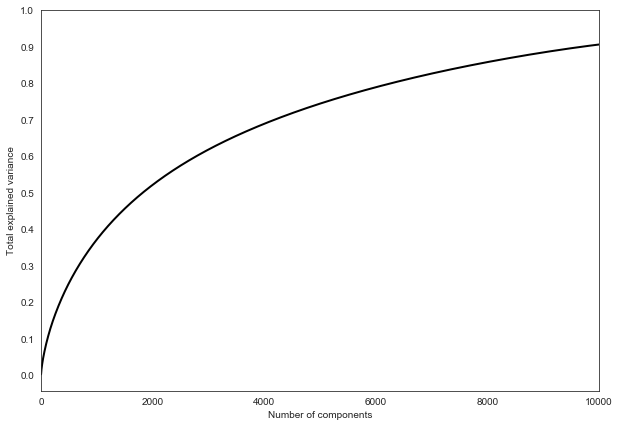

The Cumulative Explained Variance:
[0.00312186 0.00569418 0.00802635 ... 0.90622932 0.90624787 0.90626641]


In [52]:
plt.figure(figsize=(10,7))
plt.plot(np.cumsum(X_SVD_test.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 10000)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()

print('The Cumulative Explained Variance:')
print(np.cumsum(X_SVD_test.explained_variance_ratio_))

In [ ]:
X_SVD = decomposition.TruncatedSVD(n_components = 10000).fit(X_norm).fit_transform(X_norm)

In [ ]:
from sklearn.neural_network import BernoulliRBM

rbm = BernoulliRBM(learning_rate = 0.0005, n_iter = 20,
                   n_components = 100, verbose = True)

rbm.fit(X_SVD)

predict_rbm_train = rbm.predict(X_SVD)

In [0]:
print("K-Mean using RBM features:\n%s\n" % (
    metrics.classification_report(Y_train, predict_rbm_train)))

## NLP with MLP Classifier

In [32]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(100,), early_stopping = True)
mlp.fit(X_train, Y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [33]:
print("Training Set score: %0.3f" % (mlp.score(X_train, Y_train)))
print("Training Set score: %0.3f" % (mlp.score(X_test, Y_test)))

Training Set score: 0.934
Training Set score: 0.800


In [34]:
predict_mlp_test = mlp.predict(X_test)
predict_mlp_train = mlp.predict(X_train)

print('Comparing MLP CLassifier on Test data:')
print(pd.crosstab(predict_mlp_test, Y_test))

print('Comparing MLP CLassifier on Training data:')
print(pd.crosstab(predict_mlp_train, Y_train))

Comparing MLP CLassifier on Test data:
is_sarcastic     0     1
row_0                   
0             3770  878 
1             727   2638
Comparing MLP CLassifier on Training data:
is_sarcastic     0     1
row_0                   
0             9919  669 
1             569   7539


Using the MLP classifier, the model performance increase significantly. Also, originally with a network with hidden layer sizes of (1000,4), we had a accuracy score of 0.92 on the training dataset and 0.78 on the testing dataset. This is clearly overfitting. This may deal to our MLP classifier is learning the data so well that it produce an exact output on the other end of the neural netwok. Therefore, we can try to change the size of the hidden layer, or modify our L2 penalty to address the overfitting problem. 

### GridSearch CV for MLP Classifier
After reducing the hidden layer size, the MLP Classifier still have overfitting issue. Therefore, we will try GridSearch CV here to select the L2 penalty and hidden layer size. 

In [58]:
from sklearn.model_selection import GridSearchCV

MLP_para = {"alpha": [0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
           "hidden_layer_sizes": [(50,),(100,)]}

gs = GridSearchCV(mlp, MLP_para, cv=5, n_jobs = -1, verbose = 20, scoring = 'accuracy')
gs.fit(X, Y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  5.9min


KeyboardInterrupt: ignored

In [0]:
print("best score: %0.3f" % (gs.best_score_))
print("MLP Classifier PARAMETERS")
print(gs.best_estimator_.get_params())

In [37]:
mlp_tunned = MLPClassifier(hidden_layer_sizes=(50,),alpha = 0.9, early_stopping = True)
mlp_tunned.fit(X_train, Y_train)

MLPClassifier(activation='relu', alpha=0.9, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(50,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [38]:
from sklearn.model_selection import cross_val_score

print("Training Set score: %0.3f" % (mlp_tunned.score(X_train, Y_train)))
print("Testing Set score: %0.3f" % (mlp_tunned.score(X_test, Y_test)))

Training Set score: 0.817
Testing Set score: 0.755


In [0]:
cross_valid = cross_val_score(mlp_tunned, X, Y, cv=5, n_jobs = -1, verbose = 20)